# **Identitas Mahasiswa**


**Salman Rahwidean Janotama** || **18/428633/TK/47135**

---

**Object Detection - Self-Driving Car**

# **Pengaturan Awal**

## **Connect dengan Google Drive dari Model yang Dibuat**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## **Pilih Versi Tensor Flow 1.15.0**

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.2


In [ ]:
!pip3 install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 39kB/s 
     |████████████████████████████████| 512kB 50.8MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 3.8MB 59.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=c02f572ff6682a2bf70f769b2331bc45f06b48b833b5dbd25afa01a8d00080ae
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.0


## **Library dan Path**

In [ ]:
%cd '/content/gdrive/MyDrive/tensorflow1/'
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

/content/gdrive/MyDrive/tensorflow1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 31 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,907 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archi

In [ ]:
%cd /content/gdrive/MyDrive/tensorflow1/models/research/
!protoc object_detection/protos/*.proto --python_out=.
%set_env PYTHONPATH=/content/gdrive/MyDrive/tensorflow1/models/research:/content/gdrive/MyDrive/tensorflow1/models/research/slim
import os
os.environ['PYTHONPATH'] += ":/content/gdrive/MyDrive/tensorflow1/models"
import sys
sys.path.append("/content/gdrive/MyDrive/tensorflow1/models")

/content/gdrive/MyDrive/tensorflow1/models/research
env: PYTHONPATH=/content/gdrive/MyDrive/tensorflow1/models/research:/content/gdrive/MyDrive/tensorflow1/models/research/slim


## **Setup dan Build**

In [ ]:
%cd /content/gdrive/My Drive/tensorflow1/models/research/object_detection/packages/tf1
!python setup.py build
!python setup.py install

/content/gdrive/My Drive/tensorflow1/models/research/object_detection/packages/tf1
running build
running install
running bdist_egg
running egg_info
writing object_detection.egg-info/PKG-INFO
writing dependency_links to object_detection.egg-info/dependency_links.txt
writing requirements to object_detection.egg-info/requires.txt
writing top-level names to object_detection.egg-info/top_level.txt
reading manifest file 'object_detection.egg-info/SOURCES.txt'
writing manifest file 'object_detection.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib

creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/PKG-INFO -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/SOURCES.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/dependency_links.txt -> build/bdist.linux-x86_64/egg/EGG-INFO
copying object_detection.egg-info/requires.txt -> b

## **Cek Waktu Runtime Tersisa**

In [ ]:
import time, psutil
Start = time.time()- psutil.boot_time()
Left= 12*3600 - Start
print('Time remaining for this session is: ', Left/3600)

Time remaining for this session is:  11.95445348640283


In [ ]:
%cd /content/gdrive/MyDrive/tensorflow1/models/research/object_detection

/content/gdrive/MyDrive/tensorflow1/models/research/object_detection


# **Testing Model**

## **Test dengan Citra Gambar**

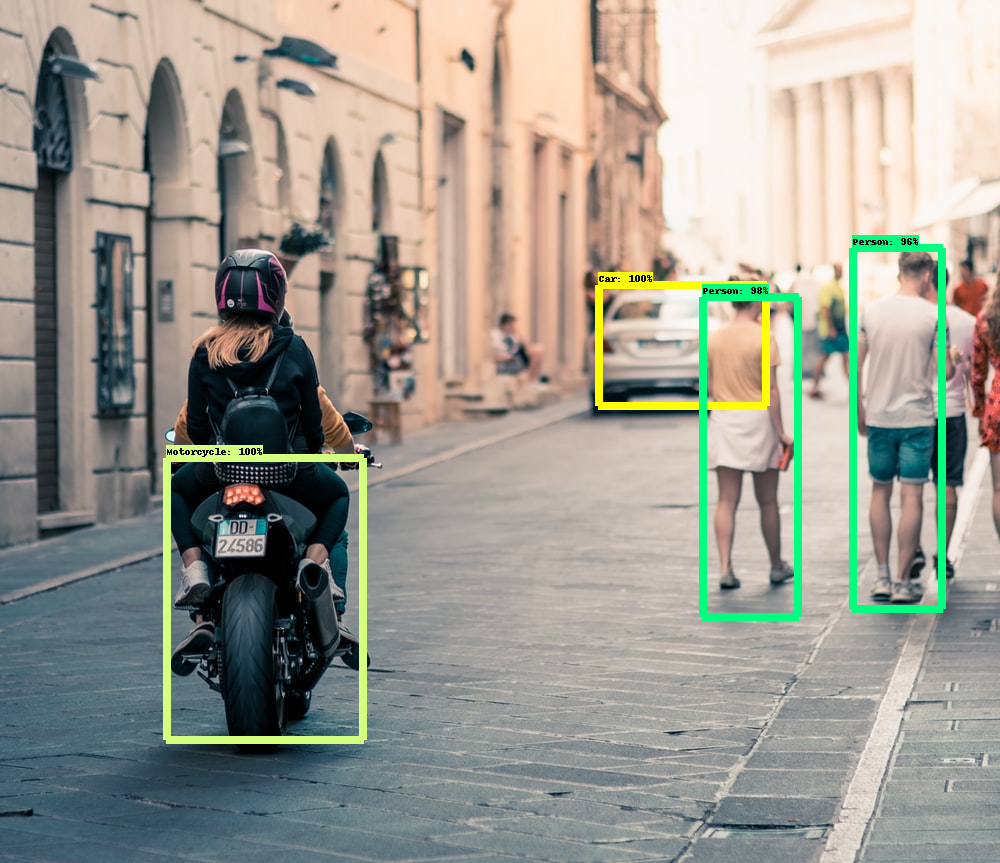

In [ ]:
######## Image Object Detection Using Tensorflow-trained Classifier #########
#
# Author: Evan Juras
# Date: 1/15/18
# Description: 
# This program uses a TensorFlow-trained neural network to perform object detection.
# It loads the classifier and uses it to perform object detection on an image.
# It draws boxes, scores, and labels around the objects of interest in the image.

## Some of the code is copied from Google's example at
## https://github.com/tensorflow/models/blob/master/research/object_detection/object_detection_tutorial.ipynb

## and some is copied from Dat Tran's example at
## https://github.com/datitran/object_detector_app/blob/master/object_detection_app.py

## but I changed it to make it more understandable to me.

# Import packages
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

# Name of the directory containing the object detection module we're using
MODEL_NAME = 'inference_graph'
IMAGE_NAME = 'test_gambar1.jpg'

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH,IMAGE_NAME)

# Number of classes the object detector can identify
NUM_CLASSES = 3

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Define input and output tensors (i.e. data) for the object detection classifier

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

# Load image using OpenCV and
# expand image dimensions to have shape: [1, None, None, 3]
# i.e. a single-column array, where each item in the column has the pixel RGB value
image = cv2.imread(PATH_TO_IMAGE)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# Perform the actual detection by running the model with the image as input
(boxes, scores, classes, num) = sess.run(
    [detection_boxes, detection_scores, detection_classes, num_detections],
    feed_dict={image_tensor: image_expanded})

# Draw the results of the detection (aka 'visulaize the results')

vis_util.visualize_boxes_and_labels_on_image_array(
    image,
    np.squeeze(boxes),
    np.squeeze(classes).astype(np.int32),
    np.squeeze(scores),
    category_index,
    use_normalized_coordinates=True,
    line_thickness=8,
    min_score_thresh=0.60)

# All the results have been drawn on image. Now display the image.
cv2_imshow(image)

# Press any key to close the image
cv2.waitKey(0)

# Clean up
cv2.destroyAllWindows()


## **Test dengan Citra Video**

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import sys

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")

# Import utilites
from utils import label_map_util
from utils import visualization_utils as vis_util

MODEL_NAME = 'inference_graph'
video_path = "/content/gdrive/MyDrive/tensorflow1/models/research/object_detection/test_video.mp4"

# Grab path to current working directory
CWD_PATH = os.getcwd()

# Path to frozen detection graph .pb file, which contains the model that is used
# for object detection.
PATH_TO_CKPT = os.path.join(CWD_PATH,MODEL_NAME,'frozen_inference_graph.pb')

# Path to label map file
PATH_TO_LABELS = os.path.join(CWD_PATH,'training','labelmap.pbtxt')

# Number of classes the object detector can identify
NUM_CLASSES = 3

# Load the label map.
# Label maps map indices to category names, so that when our convolution
# network predicts `5`, we know that this corresponds to `king`.
# Here we use internal utility functions, but anything that returns a
# dictionary mapping integers to appropriate string labels would be fine
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

# Load the Tensorflow model into memory.
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

    sess = tf.Session(graph=detection_graph)

# Input tensor is the image
image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')

# Output tensors are the detection boxes, scores, and classes
# Each box represents a part of the image where a particular object was detected
detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')

# Each score represents level of confidence for each of the objects.
# The score is shown on the result image, together with the class label.
detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')

# Number of objects detected
num_detections = detection_graph.get_tensor_by_name('num_detections:0')

cap = cv2.VideoCapture(video_path)

if cap.isOpened():
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    res=(int(width), int(height))
    # this format fail to play in Chrome/Win10/Colab
    # fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
    fourcc = cv2.VideoWriter_fourcc(*'MP4V') #codec
    out = cv2.VideoWriter('output_detect_video.mp4', fourcc, 20.0, res)

    frame = None
    while True:
        try:
            is_success, frame = cap.read()
        except cv2.error:
            continue

        if not is_success:
            break

    # OPTIONAL: do some processing
        # convert cv2 BGR format to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_expanded = np.expand_dims(image, axis=0)

        # Perform the actual detection by running the model with the image as input
        (boxes, scores, classes, num) = sess.run(
            [detection_boxes, detection_scores, detection_classes, num_detections],
            feed_dict={image_tensor: frame_expanded})
        
        # Draw the results of the detection (aka 'visulaize the results')
        vis_util.visualize_boxes_and_labels_on_image_array(
            frame,
            np.squeeze(boxes),
            np.squeeze(classes).astype(np.int32),
            np.squeeze(scores),
            category_index,
            use_normalized_coordinates=True,
            line_thickness=8,
            min_score_thresh=0.60)

        #Render to one single Video
        out.write(frame)

    out.release() 

#Cleaning Up  
cap.release()
cv2.destroyAllWindows()

Hasil Video akan ada di Drive dengan nama file sesuai dengan yang diberikan pada kode diatas (variabel ***out***)

## **Grafik Hasil Training**

In [ ]:
%cd /content/gdrive/MyDrive/tensorflow1/models/research/object_detection

/content/gdrive/MyDrive/tensorflow1/models/research/object_detection


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir training/

In [ ]:
import tensorflow as tf
import numpy as np
import argparse

from cifar import CIFAR10
from utils import model_accuracy
from tensorflow.python.framework import tensor_util

# If load from pb, you may have to use get_tensor_by_name heavily.


class CNN(object):
    def __init__(self, model_filepath):

        # The file path of model
        self.model_filepath = '/content/gdrive/MyDrive/tensorflow1/models/research/object_detection/inference_graph/saved_model/saved_model.pb'
        # Initialize the model
        self.load_graph(model_filepath=self.model_filepath)

    def load_graph(self, model_filepath):
        '''
        Lode trained model.
        '''
        print('Loading model...')
        self.graph = tf.Graph()

        with tf.gfile.GFile(model_filepath, 'rb') as f:
            graph_def = tf.GraphDef()
            graph_def.ParseFromString(f.read())

        print('Check out the input placeholders:')
        nodes = [
            n.name + ' => ' + n.op for n in graph_def.node
            if n.op in ('Placeholder')
        ]
        for node in nodes:
            print(node)

        with self.graph.as_default():
            # Define input tensor
            self.input = tf.placeholder(np.float32,
                                        shape=[None, 32, 32, 3],
                                        name='input')
            self.dropout_rate = tf.placeholder(tf.float32,
                                               shape=[],
                                               name='dropout_rate')
            tf.import_graph_def(graph_def, {
                'input': self.input,
                'dropout_rate': self.dropout_rate
            })

        self.graph.finalize()

        print('Model loading complete!')

        # Get layer names
        layers = [op.name for op in self.graph.get_operations()]
        for layer in layers:
            print(layer)
        """
        # Check out the weights of the nodes
        weight_nodes = [n for n in graph_def.node if n.op == 'Const']
        for n in weight_nodes:
            print("Name of the node - %s" % n.name)
            # print("Value - " )
            # print(tensor_util.MakeNdarray(n.attr['value'].tensor))
        """

        # In this version, tf.InteractiveSession and tf.Session could be used interchangeably.
        # self.sess = tf.InteractiveSession(graph = self.graph)
        self.sess = tf.Session(graph=self.graph)

    def test(self, data):

        # Know your output node name
        output_tensor = self.graph.get_tensor_by_name("import/cnn/output:0")
        output = self.sess.run(output_tensor,
                               feed_dict={
                                   self.input: data,
                                   self.dropout_rate: 0
                               })

        return output


def test_from_frozen_graph(model_filepath):

    tf.reset_default_graph()

    # Load CIFAR10 dataset
    cifar10 = CIFAR10()
    x_test = cifar10.x_test
    y_test = cifar10.y_test
    y_test_onehot = cifar10.y_test_onehot
    num_classes = cifar10.num_classes
    input_size = cifar10.input_size

    # Test 500 samples
    x_test = x_test[0:500]
    y_test = y_test[0:500]

    model = CNN(model_filepath=model_filepath)

    test_prediction_onehot = model.test(data=x_test)
    test_prediction = np.argmax(test_prediction_onehot, axis=1).reshape(
        (-1, 1))
    test_accuracy = model_accuracy(label=y_test, prediction=test_prediction)

    print('Test Accuracy: %f' % test_accuracy)


def main():

    model_pb_filepath_default = './model/cifar10_cnn.pb'

    # Argparser
    parser = argparse.ArgumentParser(
        description='Load and test model from frozen graph pb file.')

    parser.add_argument('--model_pb_filepath',
                        type=str,
                        help='model pb-format frozen graph file filepath',
                        default=model_pb_filepath_default)

    argv = parser.parse_args()

    model_pb_filepath = argv.model_pb_filepath

    test_from_frozen_graph(model_filepath=model_pb_filepath)


if __name__ == '__main__':

    main()